In [1]:
#%pip install pandas

#%pip install rpy2

import rpy2
import rpy2.rinterface as ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

In [2]:
import sqlite3 as sq3
import pandas as pd

In [3]:
##Download the database using the unix command wget
#!wget https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/sql/opioid.db

## Create the connection
con = sq3.connect("opioid.db")

population_df = pd.read_sql("select * from population", con)
annual_df = pd.read_sql("select * from annual", con)
land_df = pd.read_sql("select * from land", con)

# you have to close the connection
con.close

#population_df.head()
#annual_df.head()
#land_df.head()

<function Connection.close()>

In [4]:
print(annual_df[annual_df['countyfips'] == 'NA'].head(10))

         BUYER_COUNTY BUYER_STATE  year count DOSAGE_UNIT countyfips
187  188     ADJUNTAS          PR  2006   147      102800         NA
188  189     ADJUNTAS          PR  2007   153      104800         NA
189  190     ADJUNTAS          PR  2008   153       45400         NA
190  191     ADJUNTAS          PR  2009   184       54200         NA
191  192     ADJUNTAS          PR  2010   190       56200         NA
192  193     ADJUNTAS          PR  2011   186       65530         NA
193  194     ADJUNTAS          PR  2012   138       57330         NA
194  195     ADJUNTAS          PR  2013   138       65820         NA
195  196     ADJUNTAS          PR  2014    90       59490         NA
196  197       AGUADA          PR  2006   160       49200         NA


In [5]:
print(annual_df[(annual_df['countyfips'] == 'NA')&(annual_df['BUYER_STATE']!='PR')].head(10))

                          BUYER_COUNTY BUYER_STATE  year count DOSAGE_UNIT  \
10071  10072                      GUAM          GU  2006   319      265348   
10072  10073                      GUAM          GU  2007   330      275600   
10073  10074                      GUAM          GU  2008   313      286900   
10074  10075                      GUAM          GU  2009   390      355300   
10075  10076                      GUAM          GU  2010   510      413800   
10076  10077                      GUAM          GU  2011   559      475600   
10077  10078                      GUAM          GU  2012   616      564800   
10078  10079                      GUAM          GU  2013   728      623200   
10079  10080                      GUAM          GU  2014   712      558960   
18501  18502  NORTHERN MARIANA ISLANDS          MP  2006   165      117850   

      countyfips  
10071         NA  
10072         NA  
10073         NA  
10074         NA  
10075         NA  
10076         NA  
10077   

In [6]:
annual_df.loc[(annual_df['BUYER_STATE']=='AR') & (annual_df['BUYER_COUNTY']=='MONTGOMERY'),'countyfips'] = '05097'

In [7]:
print(annual_df[(annual_df['BUYER_STATE'] == 'AR')&(annual_df['BUYER_COUNTY']=='MONTGOMERY')])

             BUYER_COUNTY BUYER_STATE  year count DOSAGE_UNIT countyfips
17429  17430   MONTGOMERY          AR  2006   469      175390      05097
17430  17431   MONTGOMERY          AR  2007   597      241270      05097
17431  17432   MONTGOMERY          AR  2008   561      251760      05097
17432  17433   MONTGOMERY          AR  2009   554      244160      05097
17433  17434   MONTGOMERY          AR  2010   449      247990      05097
17434  17435   MONTGOMERY          AR  2011   560      313800      05097
17435  17436   MONTGOMERY          AR  2012   696      339520      05097
17436  17437   MONTGOMERY          AR  2013   703      382300      05097
17437  17438   MONTGOMERY          AR  2014   491      396900      05097


In [8]:
annual_df.dropna(subset = ['BUYER_COUNTY'])

,,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,1,ABBEVILLE,SC,2006,877,363620,45001
1,2,ABBEVILLE,SC,2007,908,402940,45001
2,3,ABBEVILLE,SC,2008,871,424590,45001
3,4,ABBEVILLE,SC,2009,930,467230,45001
4,5,ABBEVILLE,SC,2010,1197,539280,45001
...,...,...,...,...,...,...,...
27736,27737,ZAVALA,TX,2010,248,200100,48507
27737,27738,ZAVALA,TX,2011,406,244800,48507
27738,27739,ZAVALA,TX,2012,473,263700,48507
27739,27740,ZAVALA,TX,2013,399,186700,48507


In [9]:
print(annual_df[annual_df['BUYER_COUNTY']=='NA'])
#empty dataframe as expected

Empty DataFrame
Columns: [, BUYER_COUNTY, BUYER_STATE, year, count, DOSAGE_UNIT, countyfips]
Index: []


In [10]:
land_area_df = land_df[['Areaname', 'STCOU', 'LND110210D']]
print(land_area_df.head())

        Areaname  STCOU  LND110210D
0  UNITED STATES  00000  3531905.43
1        ALABAMA  01000    50645.33
2    Autauga, AL  01001      594.44
3    Baldwin, AL  01003     1589.78
4    Barbour, AL  01005      884.88


In [11]:
land_area_df.rename(columns={'STCOU': 'countyfips'}, inplace=True)
print(land_area_df.head())



        Areaname countyfips  LND110210D
0  UNITED STATES      00000  3531905.43
1        ALABAMA      01000    50645.33
2    Autauga, AL      01001      594.44
3    Baldwin, AL      01003     1589.78
4    Barbour, AL      01005      884.88


In [12]:
county_info_df = pd.merge(population_df, land_area_df, on='countyfips', how='left')

In [13]:
print('land counts: ', len(land_df))
print('land area counts: ',len(land_area_df))
print('county info counts: ',len(county_info_df))
print('population counts: ',len(population_df))

#county info counts matches population counts as expected since it's a left join

land counts:  3198
land area counts:  3198
county info counts:  28265
population counts:  28265


In [14]:
annual_df["DOSAGE_UNIT"] = pd.to_numeric(annual_df["DOSAGE_UNIT"])
avg_by_year = annual_df.groupby("year")['DOSAGE_UNIT'].mean().reset_index()

print(avg_by_year.head())

   year   DOSAGE_UNIT
0  2006  2.654669e+06
1  2007  2.995906e+06
2  2008  3.254271e+06
3  2009  3.526038e+06
4  2010  3.783656e+06


In [15]:
#%pip install matplotlib
import matplotlib.pyplot as plt

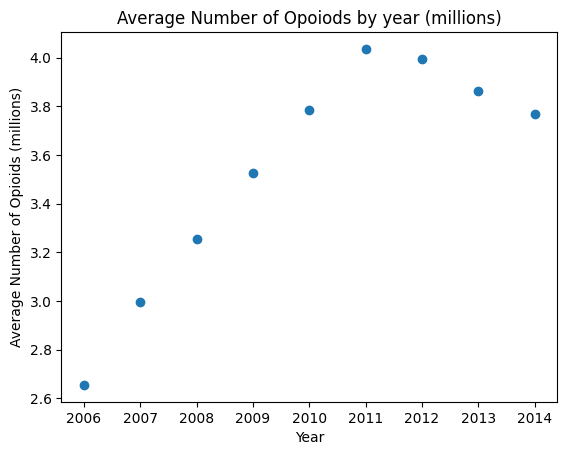

In [16]:
plt.scatter(avg_by_year['year'],avg_by_year['DOSAGE_UNIT']/1000000)
plt.xlabel('Year')
plt.ylabel('Average Number of Opioids (millions)')
plt.title('Average Number of Opoiods by year (millions)')
plt.show()

In [38]:
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import default_converter

!wget https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/sql/opioid.db

## Create the connection
con = sq3.connect("opioid.db")

population_df = pd.read_sql("select * from population", con)
annual_df = pd.read_sql("select * from annual", con)
land_df = pd.read_sql("select * from land", con)

# you have to close the connection
con.close

print(annual_df.columns)
print(land_df.columns)
print(population_df.columns)

annual_df = annual_df.rename(columns={'': 'unnamed'})
land_df = land_df.rename(columns={'': 'unnamed'})
population_df = population_df.rename(columns={'': 'unnamed'})

# Send pandas df to R
with localconverter(default_converter + pandas2ri.converter):
    ro.globalenv["annual_dat"] = annual_df
    ro.globalenv["land_dat"] = land_df
    ro.globalenv["population_dat"] = population_df


z = ro.r('''
library(dplyr)

annual_missing <- annual_dat %>%
  filter(is.na(countyfips))

annual_missing
''')

print(z)


--2026-02-17 08:07:56--  https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/sql/opioid.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7774208 (7.4M) [application/octet-stream]
Saving to: ‘opioid.db.2’

opioid.db.2           0%[                    ]       0  --.-KB/s               

opioid.db.2         100%[===================>]   7.41M  --.-KB/s    in 0.1s    

2026-02-17 08:07:56 (73.1 MB/s) - ‘opioid.db.2’ saved [7774208/7774208]

Index(['', 'BUYER_COUNTY', 'BUYER_STATE', 'year', 'count', 'DOSAGE_UNIT',
       'countyfips'],
      dtype='str')
Index(['', 'Areaname', 'STCOU', 'LND010190F', 'LND010190D', 'LND010190N1',
       'LND010190N2', 'LND010200F', 'LND010200D', 'LND010200N1', 'LND010200N2',
       'LND110180F', 'LND110180D', 'LND110180N1', 'LND110180N2', 'LND110190F',
       'LND110190D', 'LND110190N1', 'LND110190N2', 'LND110200F', 'LND110200D',
       'LND110200N1', 'LND110200N2', 'LND110210F', 'LND110210D', 'LND110210N1',
       'LND110210N2', 'LND210190F', 'LND210190D', 'LND210190N1', 'LND210190N2',
       'LND210200F', 'LND210200D', 'LND210200N1', 'LND210200N2'],
      dtype='str')
Index(['', 'BUYER_COUNTY', 'BUYER_STATE', 'countyfips', 'STATE', 'COUNTY',
       'county_name', 'NAME', 'variable', 'year', 'population'],
      dtype='str')
[1] unnamed   

In [39]:
dplyr = importr("dplyr")


ro.r('''
annual_dat <- dplyr::mutate(annual_dat,
    countyfips = dplyr::case_when(
        BUYER_STATE == "AR" & BUYER_COUNTY == "MONTGOMERY" ~ "05097",
        TRUE ~ countyfips
    )
)
''')

R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :  
R callback write-console: 
   
R callback write-console:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages
  


In [40]:
ro.r('''
library(dplyr)

ar_missing <- annual_dat %>%
  dplyr::filter(is.na(countyfips) & BUYER_STATE == "AR")

montgomery_ar <- annual_dat %>%
  dplyr::filter(BUYER_COUNTY == "MONTGOMERY" & BUYER_STATE == "AR")

na_buyer_county <- annual_dat %>%
  dplyr::filter(is.na(BUYER_COUNTY))

annual_dat <- annual_dat %>%
  dplyr::filter(!is.na(BUYER_COUNTY))
''')


In [41]:
ro.r('''
land_area_dat <- land_dat %>%
  dplyr::select(Areaname, STCOU, LND110210D) %>%
  dplyr::rename(countyfips = STCOU)
''')

In [42]:
ro.r('''
county_info_dat <- dplyr::left_join(population_dat, land_area_dat, by = "countyfips")
''')

In [44]:
with localconverter(default_converter + pandas2ri.converter):
    county_info_df2 = ro.conversion.rpy2py(ro.globalenv["county_info_dat"])

print(county_info_df2.head())

  unnamed BUYER_COUNTY BUYER_STATE countyfips STATE COUNTY county_name  \
1       1      AUTAUGA          AL      01001     1      1     Autauga   
2       2      BALDWIN          AL      01003     1      3     Baldwin   
3       3      BARBOUR          AL      01005     1      5     Barbour   
4       4         BIBB          AL      01007     1      7        Bibb   
5       5       BLOUNT          AL      01009     1      9      Blount   

                      NAME    variable  year population     Areaname  \
1  Autauga County, Alabama  B01003_001  2006      51328  Autauga, AL   
2  Baldwin County, Alabama  B01003_001  2006     168121  Baldwin, AL   
3  Barbour County, Alabama  B01003_001  2006      27861  Barbour, AL   
4     Bibb County, Alabama  B01003_001  2006      22099     Bibb, AL   
5   Blount County, Alabama  B01003_001  2006      55485   Blount, AL   

  LND110210D  
1     594.44  
2    1589.78  
3     884.88  
4     622.58  
5     644.78  
